In [313]:
from IPython.display import display
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()
pd.options.display.expand_frame_repr = False

In [314]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from scipy.stats import boxcox
from scipy.stats import zscore

In [315]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.formula.api import logit
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import ProbPlot

In [316]:
def norm_data(df):
    """ Нормализуем данные """
    for col in df.columns:
        label_encoder = LabelEncoder()
        scaler = MinMaxScaler()
        if df[col].dtype.kind in 'O':
            df[col] = label_encoder.fit_transform(df[col])
        elif df[col].dtype.kind in 'iufc':
            if df[col].min() != 0 and df[col].min() != 1:
                df[col] = scaler.fit_transform(df[[col]])
            else:
                pass
    return df

,y,x1,x2,x3,x4,x5
0,0,14,4.30,1.00,2,3.72
1,0,12,11.54,8.49,3,40.28
2,0,14,5.84,2.47,3,56.00
3,1,11,14.70,6.60,1,57.41
4,0,21,5.10,3.48,1,83.00
5,0,12,6.14,3.09,1,62.57
6,1,17,5.05,1.14,3,22.16
7,1,12,11.30,8.85,1,12.00
8,0,14,3.30,1.20,3,110.00
9,1,19,6.60,4.30,1,2.96


,y,x1,x2,x3,x4,x5
0,0,0.1875,0.063694,1.00,2,0.007318
1,0,0.0625,0.524841,8.49,3,0.098947
2,0,0.1875,0.161783,2.47,3,0.138346
3,1,0.0000,0.726115,6.60,1,0.141880
4,0,0.6250,0.114650,3.48,1,0.206015
5,0,0.0625,0.180892,3.09,1,0.154812
6,1,0.3750,0.111465,1.14,3,0.053534
7,1,0.0625,0.509554,8.85,1,0.028070
8,0,0.1875,0.000000,1.20,3,0.273684
9,1,0.5000,0.210191,4.30,1,0.005414


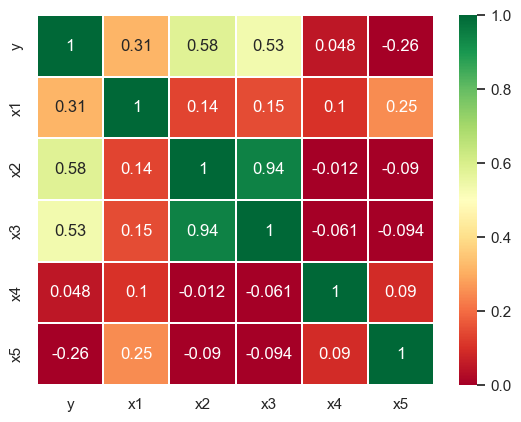

In [317]:
# Read dataframe
data = pd.read_excel('doctor.xlsx')
data.dropna(inplace=True)
display(data)

# Normalization
data = norm_data(data)
display(data)

# Correlation
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.1, vmin=0)

# Dependent variable
explore_column = 'y' 

# Categorical variables 
categorical_columns = ['x4']
for cc in categorical_columns:
    data[cc] = data[cc].astype('category')

### Линейная регрессия

In [318]:
class LinearRegressionResearch:
    def __init__(self, df, column, influence_measures_filename=None):
        self.filename = influence_measures_filename
            
        self.df = df
        self.column = column
        self.x = df.drop(columns=column)
        self.y = df[column]
        
        x_columns = ''
        for c in self.x.columns:
            if isinstance(self.x[c].dtype, pd.api.types.CategoricalDtype):
                x_columns += f'C({c})+'
            else:
                x_columns += f'{c}+'
        
        model_formula = f'{self.column} ~ {x_columns[:-1]}'
        self.model = logit(model_formula, data=self.df)
        self.results = self.model.fit()
        
    def info(self):
        # Использование библиотеки statsmodels для получения summary
        print(self.results.summary(title=self.column))
        
        # Вывод уравнения(закона) регрессии
        intercept = self.results.params[0]
        coefficients = self.results.params[1:]
        output_str = f'Law:\n{self.column} = '
        for i, c in enumerate(self.results.params.index[1:]):
            output_str += f'({coefficients[i]}) * {c} + '
            if i % 2 != 0:
                output_str += '\n'
        output_str += f'({intercept})'
        print(output_str)
        
        # Проведём анализ дисперсии модели
        print('==============================================================================')
        anova_result = anova_lm(self.results)
        print(anova_result)
        
        # Получение мер влиятельности для каждого наблюдения
        print('==============================================================================')
        influence = self.results.get_influence()
        influence_measures = influence.summary_frame()
        if self.filename is not None:
            influence_measures.to_csv(f'{self.filename}.csv', index=False)
        display(influence_measures)
    
    def draw_plots(self):
        # Scatter plots
        scatter_plots  = sns.pairplot(data, x_vars=self.df.columns, y_vars=self.df.columns, kind='reg')
        scatter_plots.fig.suptitle("Pair-plot with Regression Lines", y=1, fontsize=20)
        plt.show()

        # Residuals vs Fitted
        plt.scatter(self.results.predict(self.x), self.residuals)
        plt.axhline(y=0, color='r', linestyle='--')
        plt.title('Residuals vs Fitted')
        plt.xlabel('Fitted values')
        plt.ylabel('Residuals')
        plt.show()

        # Residuals vs Fitted
        plt.scatter(self.results.predict(self.x), np.sqrt(zscore(self.residuals)))
        plt.title('Scale-Location')
        plt.xlabel('Fitted values')
        plt.ylabel('\u221AStandardized residuals')
        plt.show()

        # Normal Q-Q plot
        QQ = ProbPlot(zscore(self.residuals))
        QQ.qqplot(line='45', alpha=0.5, lw=1)
        plt.title('Normal Q-Q')
        plt.xlabel('Theoretical Quantiles')
        plt.ylabel('Standardized residuals')
        plt.show()
        
        # График Residuals vs Leverage
        fig, ax = plt.subplots(figsize=(12, 8))
        sm.graphics.influence_plot(self.results, criterion="cooks", size=25, plot_alpha=0.5, ax=ax)
        plt.title('Residuals vs Leverage', fontsize=20)
        plt.show()
    
    def run_tests(self):
        print('==============================================================================')
        # Теста Бройша-Пагана (Breusch-Pagan test) на гетероскедастичность.
        het_test = sms.het_breuschpagan(self.residuals, self.model.exog)
        print(f'Breusch-Pagan test: \n'
              f'LM statistic: {het_test[0]}      LM-Test p-value: {het_test[1]:} \n'
              f'F-statistic: {het_test[2]}       F-Test p-value: {het_test[3]:} \n')
        
        # Проводим тест Дарбина-Уотсона (Durbin-Watson test) на автокорреляцию остатков.
        durbin_watson_statistic = sms.durbin_watson(self.residuals)
        print(f'Durbin-Watson test:\n'
              f'statistic: {durbin_watson_statistic} \n')
        
        # Проводим тесты на нормальность распределения остатков. 
        jarque_bera_test = sms.jarque_bera(self.residuals)
        print(f'Jarque-Bera test:\n'
              f'statistic: {jarque_bera_test[0]}      p-value: {jarque_bera_test[1]}')
        omni_normtest_statistic, omni_normtest_p_value = sms.omni_normtest(self.residuals)
        print(f'Omni-normtest test:\n'
              f'statistic: {omni_normtest_statistic}      p-value: {omni_normtest_statistic}')
        
        # Проверяем модель на мультиколлинеарность данных.
        print('==============================================================================')
        vif_tol_data = pd.DataFrame()
        vif_tol_data["Variable"] = self.x.columns
        vif_tol_data["VIF"] = [variance_inflation_factor(self.x.values, i) for i in range(self.x.shape[1])]
        vif_tol_data["Tolerance"] = 1 / vif_tol_data["VIF"]
        display(vif_tol_data)

### Строим базовую модель

In [319]:
base_research = LinearRegressionResearch(data, column=explore_column, influence_measures_filename='influence_measures')
base_research.info()

Optimization terminated successfully.
         Current function value: 0.338369
         Iterations 8
                                      y                                       
Dep. Variable:                      y   No. Observations:                   58
Model:                          Logit   Df Residuals:                       51
Method:                           MLE   Df Model:                            6
Date:                Sat, 25 Nov 2023   Pseudo R-squ.:                  0.4831
Time:                        15:23:59   Log-Likelihood:                -19.625
converged:                       True   LL-Null:                       -37.967
Covariance Type:            nonrobust   LLR p-value:                 2.030e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.9722      1.439     -2.065      0.039      -5.793      -0.151
C(x4)[T.2]    -2.1462      4.

AttributeError: 'LogitResults' object has no attribute 'ssr'

### Попытаемся улучшить базовую модель при помощи (AIC/BIC) 

In [ ]:
def stepwise_selection(df, column, criteria: str = 'AIC'):
    """ 
        Улучшаем модель при помощи:
            ::AIC (Akaike Information Criterion) 
                            или
            ::BIC (Bayesian Information Criterion) 
    """
    
    # Проверка, что criteria является строкой и принимает только 'AIC' или 'BIC'
    if not isinstance(criteria, str) or criteria not in ['AIC', 'BIC']:
        raise ValueError("Параметр 'criteria' должен быть строкой ('AIC' или 'BIC').")
    else:
        criteria = criteria.upper()
    
    
    drop_index = None
    output = ('                                    STEPS                                     \n'
              '==============================================================================\n')
    
    x = df.drop(columns=column)
    y = df[column]
    remaining_features = list(x.columns)
    best_model = sm.OLS(y, sm.add_constant(x[remaining_features])).fit()
    best_criterion = best_model.aic if criteria == 'AIC' else best_model.bic
    
    k = True
    while k:
        k = False
        output += (f'Selected Features: {remaining_features} \n'
                   f'{criteria}: {best_criterion} \n')
        
        for index in range(len(remaining_features)):
            features = remaining_features[:index] + remaining_features[(index+1):]
            model = sm.OLS(y, sm.add_constant(x[features])).fit()
            criterion = model.aic if criteria == 'AIC' else model.bic
    
            if criterion < best_criterion:
                k = True
                best_criterion = criterion
                best_model = model
                drop_index = index

        if k:
            remaining_features.pop(drop_index)
    
    print(output)
    return best_model, remaining_features

In [ ]:
# Пошаговый отбор признаков с использованием AIC
new_model, selected_features = stepwise_selection(data, column=explore_column, criteria='AIC')

### Проведём исследование улучшенной модели

In [ ]:
enhanced_research = LinearRegressionResearch(data[selected_features + [explore_column]], column=explore_column)
enhanced_research.info()
enhanced_research.draw_plots()
enhanced_research.run_tests()

### Попытаемся улучшить уже улучшенную модель при помощи (Box-Cox)

In [ ]:
# Применяем преобразование Бокса-Кокса к зависимой переменной
y_transformed, lambda_value = boxcox(data[explore_column] + 1)  # + 1 чтобы не было 0-значений
new_explore_column = explore_column + '_t'
data[new_explore_column] = y_transformed

# Проводим анализ заново
enhanced_research = LinearRegressionResearch(data[selected_features + [new_explore_column]],
                                             column=new_explore_column)
enhanced_research.info()
enhanced_research.draw_plots()
enhanced_research.run_tests()